In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
#pandas를 이용해 dataframe생성-구글플레이스토어
google=pd.read_csv("Google-Playstore.csv",engine='python')
#data확인
google.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [3]:
#필요한 부분 추출
#columns값중 Installs: 설치수, Rating: 평점, Rating Count: 리뷰 수, Free : 앱의 유료,무료 여부
gData=google[['App Name','Category','Rating','Rating Count','Installs','Free','Ad Supported','Content Rating']]

In [4]:
#결측값 확인
gData.isnull().sum()

App Name              2
Category              0
Rating            22883
Rating Count      22883
Installs            107
Free                  0
Ad Supported          0
Content Rating        0
dtype: int64

In [5]:
#결측값 제거
gData.dropna(subset=['App Name','Rating','Rating Count','Installs'],inplace=True)
gData.isnull().sum()

App Name          0
Category          0
Rating            0
Rating Count      0
Installs          0
Free              0
Ad Supported      0
Content Rating    0
dtype: int64

In [6]:
#'Installs' 부분에 '1000+'과 같이 뒤에 '+'제거후 실수형으로 변환후 다시 정수형
gData.Installs = gData.Installs.str.replace(',','')
gData.Installs = gData.Installs.str.replace('+','')
gData.Installs = gData.Installs.str.replace('Free','0')
gData['Installs'] = pd.to_numeric(gData['Installs'])

In [7]:
#columns별 데이터 타입
gData.dtypes

App Name           object
Category           object
Rating            float64
Rating Count      float64
Installs            int64
Free                 bool
Ad Supported         bool
Content Rating     object
dtype: object

In [8]:
# 설치수와 평점 관계 (가설확인)

In [9]:
#Rating & Installs
#가설 : 설치수가 높을 수록 평점이 높을 것이다.
#앱 설치수별 평균 평점
df=gData
df=df.groupby(['Installs'], as_index=False).mean()
df=df[['Installs','Rating']]
df=df.sort_values('Rating',ascending=False) #내림차순으로 정렬 (인덱스 번호 수정)
df.set_index("Installs",inplace=True)
df.reset_index(drop=False,inplace=True)
df.head()

,Installs,Rating
0,500000000,4.273846
1,100000000,4.269708
2,1000000000,4.234545
3,50000000,4.217961
4,10000000000,4.200000


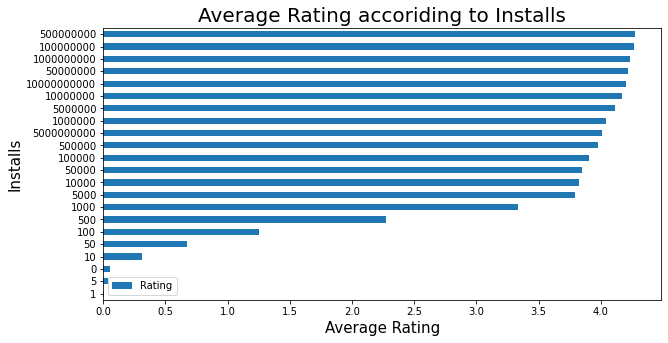

In [10]:
df=df.sort_values(by=['Rating'],ascending=True)
df.plot.barh(x='Installs',y='Rating',rot=0,figsize=(10,5),)
plt.title('Average Rating accoriding to Installs',fontsize=20) 

plt.xlabel('Average Rating',fontsize=15)
plt.ylabel('Installs',fontsize=15)

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)

plt.show()

In [11]:
# 카테고리를 요인으로 두었을 때의 평점 & 카테고리

In [12]:
#앱 카테고리별 평점 평균 구하기
df=gData
df=df.groupby(['Category'], as_index=False).mean()
df=df[['Category','Rating']]
df=df.sort_values('Rating',ascending=False) #내림차순으로 정렬 (인덱스 번호 수정)
df.set_index("Category",inplace=True)
df.reset_index(drop=False,inplace=True)
df.head()

,Category,Rating
0,Role Playing,3.384498
1,Casino,3.279682
2,Simulation,3.210887
3,Weather,3.120295
4,Card,3.085160


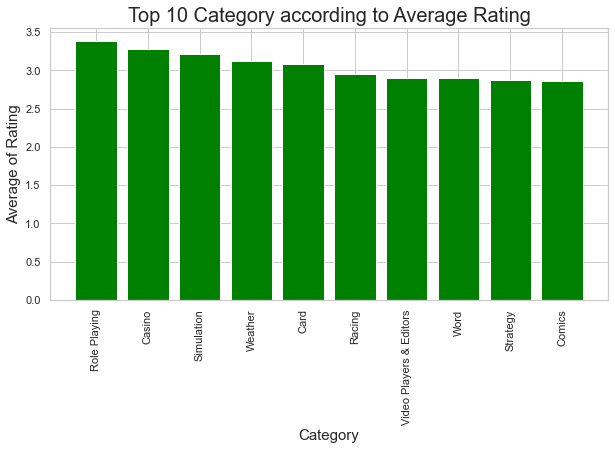

In [13]:
sns.set_theme(style="whitegrid")

result=df.iloc[:10,:] #인덱스 번호 변경
list_x=result['Category']
list_y=result['Rating']

plt.figure(figsize=(10, 5))
plt.bar(list_x, list_y,color='green')
plt.rc('font',family="Malgun Gothic")
plt.title('Top 10 Category according to Average Rating',fontsize=20) 
plt.ylabel('Average of Rating',fontsize=15) #y축 : 카테고리별 평점 평균
plt.xlabel('Category',fontsize=15) #x축 : 카테고리명
plt.rc('xtick', labelsize=13)
plt.xticks(rotation=90)
plt.rc('ytick', labelsize=12)
plt.show()

In [14]:
# 추가데이터를 통한 카테고리별 설치수 분포

In [15]:
# 광고유무에 따른 평점과 설치 수 비교

Ad Supported True Average Installs : 218704.464319
Ad Supported False Average Installs : 151577.842086


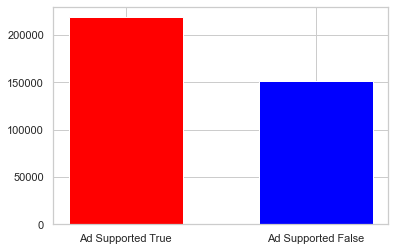

In [16]:
#Ad Supported & Installs
sns.set_theme(style="whitegrid")

Ad=gData[['Ad Supported','Installs']]
Ad_T=Ad.loc[Ad['Ad Supported']==True, 'Installs']
Ad_F=Ad.loc[Ad['Ad Supported']==False, 'Installs']

print('Ad Supported True Average Installs : %f'%(Ad_T.mean())) #광고 o
print('Ad Supported False Average Installs : %f'%(Ad_F.mean())) #광고 x

#시각화
values=[Ad_T.mean(),Ad_F.mean()]
ad=['Ad Supported True','Ad Supported False']

plt.bar(ad,values,color=['red','blue'],width=0.6)
plt.show()

Ad Supported True Average Installs : 218704.464319
Ad Supported False Average Installs : 151577.842086


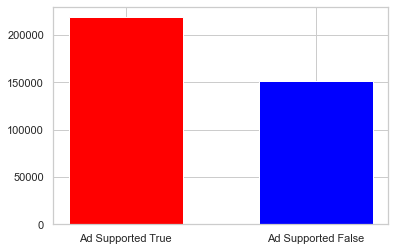

In [17]:
#Ad Supported & Installs
sns.set_theme(style="whitegrid")

Ad=gData[['Ad Supported','Installs']]
Ad_T=Ad.loc[Ad['Ad Supported']==True, 'Installs']
Ad_F=Ad.loc[Ad['Ad Supported']==False, 'Installs']

print('Ad Supported True Average Installs : %f'%(Ad_T.mean())) #광고 o
print('Ad Supported False Average Installs : %f'%(Ad_F.mean())) #광고 x

#시각화
values=[Ad_T.mean(),Ad_F.mean()]
ad=['Ad Supported True','Ad Supported False']

plt.bar(ad,values,color=['red','blue'],width=0.6)
plt.show()

Ad Supported True Average Rating : 2.541531
Ad Supported False Average Rating : 1.865425


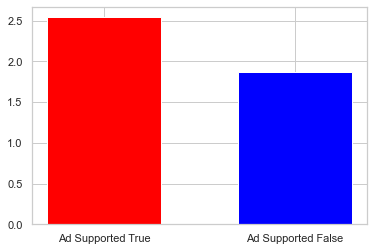

In [18]:
#Ad Supported & Rating
sns.set_theme(style="whitegrid")

Ad=gData[['Ad Supported','Rating']]
Ad_T=Ad.loc[Ad['Ad Supported']==True, 'Rating']
Ad_F=Ad.loc[Ad['Ad Supported']==False, 'Rating']

print('Ad Supported True Average Rating : %f'%(Ad_T.mean())) #광고 o
print('Ad Supported False Average Rating : %f'%(Ad_F.mean())) #광고 x

#시각화
values=[Ad_T.mean(),Ad_F.mean()]
ad=['Ad Supported True','Ad Supported False']

plt.bar(ad,values,color=['red','blue'],width=0.6)
plt.show()

In [19]:
# 이용연령에 따른 평점과 설치 수 비교

In [20]:
#Content Rating 고유값 확인
gData['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [21]:
df=gData
df=df.groupby(['Content Rating'], as_index=False).mean()
df=df[['Content Rating','Rating']]
df=df.sort_values('Rating',ascending=False) #내림차순으로 정렬 (인덱스 번호 수정)
df.set_index("Content Rating",inplace=True)
df.reset_index(drop=False,inplace=True)
#Unrated 행 제거
df=df.drop(index=df.index[0])
df

,Content Rating,Rating
1,Everyone 10+,2.688936
2,Adults only 18+,2.474436
3,Mature 17+,2.464136
4,Teen,2.317363
5,Everyone,2.176141


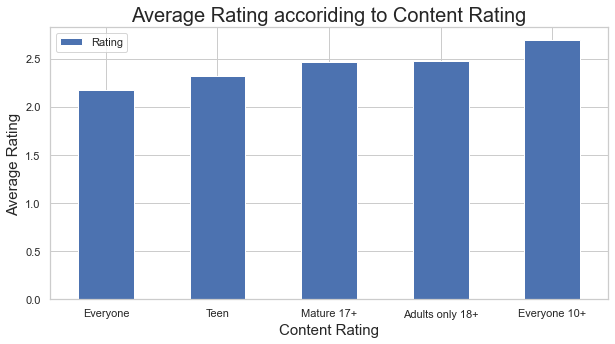

In [22]:
#시각화
sns.set_theme(style="whitegrid")

df=df.sort_values(by=['Rating'],ascending=True)
df.plot.bar(x='Content Rating',y='Rating',rot=0,figsize=(10,5),)
plt.title('Average Rating accoriding to Content Rating',fontsize=20) 

plt.xlabel('Content Rating',fontsize=15)
plt.ylabel('Average Rating',fontsize=15)

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)

plt.show()

In [23]:
df=gData
df=df.groupby(['Content Rating'], as_index=False).mean()
df=df[['Content Rating','Installs']]
df=df.sort_values('Installs',ascending=False) #내림차순으로 정렬 (인덱스 번호 수정)
df.set_index('Content Rating',inplace=True)
df.reset_index(drop=False,inplace=True)
#Unrated 행 제거
df=df.drop(index=df.index[5])
df

,Content Rating,Installs
0,Everyone 10+,508833.258744
1,Teen,414367.941608
2,Mature 17+,211197.113023
3,Everyone,156746.445421
4,Adults only 18+,129588.879699


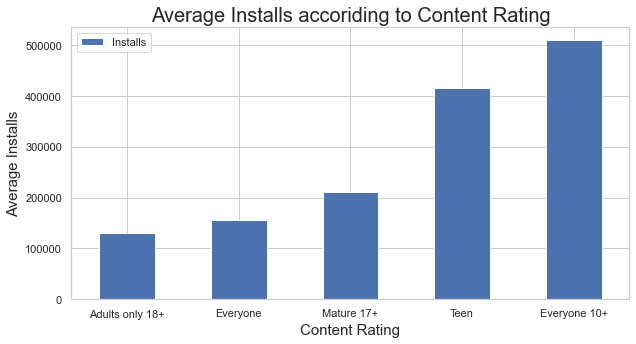

In [24]:
#시각화
sns.set_theme(style="whitegrid")

df=df.sort_values(by=['Installs'],ascending=True)
df.plot.bar(x='Content Rating',y='Installs',rot=0,figsize=(10,5),)
plt.title('Average Installs accoriding to Content Rating',fontsize=20) 

plt.xlabel('Content Rating',fontsize=15)
plt.ylabel('Average Installs',fontsize=15)

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=12)

plt.show()

In [25]:
# 유료무료화 여부에 따른 평점과 설치 수

Free Apps Average Rating : 2.199949
Paid Apps Average Rating : 2.363458


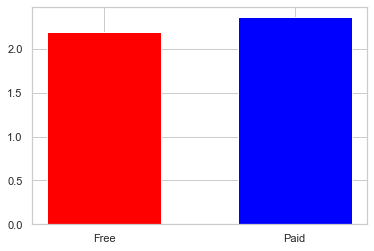

In [26]:
#Free & Rating
sns.set_theme(style="whitegrid")

Pay=gData[['Free','Rating']]
Pay_free=Pay.loc[Pay['Free']==True, 'Rating']
Pay_paid=Pay.loc[Pay['Free']==False, 'Rating']

print('Free Apps Average Rating : %f'%(Pay_free.mean())) #무료 앱
print('Paid Apps Average Rating : %f'%(Pay_paid.mean())) #유료 앱

#시각화
values=[Pay_free.mean(),Pay_paid.mean()]
price=['Free','Paid']

plt.bar(price,values,color=['red','blue'],width=0.6)
plt.show()

Free Apps Average Installs : 188628.549083
Paid Apps Average Installs : 8864.063223


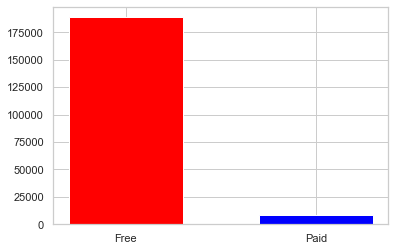

In [27]:
#Installs & Rating
sns.set_theme(style="whitegrid")

Pay=gData[['Free','Installs']]
Pay_free=Pay.loc[Pay['Free']==True, 'Installs']
Pay_paid=Pay.loc[Pay['Free']==False, 'Installs']

print('Free Apps Average Installs : %f'%(Pay_free.mean())) #무료 앱
print('Paid Apps Average Installs : %f'%(Pay_paid.mean())) #유료 앱

#시각화
values=[Pay_free.mean(),Pay_paid.mean()]
price=['Free','Paid']

plt.bar(price,values,color=['red','blue'],width=0.6)
plt.show()

In [28]:
# 데이터간의 상관관계

In [29]:
gData.corr()

,Rating,Rating Count,Installs,Free,Ad Supported
Rating,1.000000,0.013038,0.011214,-0.010756,0.160502
Rating Count,0.013038,1.000000,0.545281,0.001410,0.005294
Installs,0.011214,0.545281,1.000000,0.001638,0.002207
Free,-0.010756,0.001410,0.001638,1.000000,0.124765
Ad Supported,0.160502,0.005294,0.002207,0.124765,1.000000


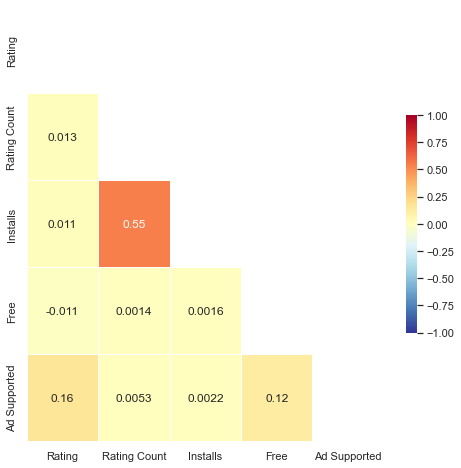

In [30]:
#데이터 간의 상관관계 시각화
df = gData.corr()
fig, ax = plt.subplots( figsize=(8,8) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5},annot = True, mask=mask,      
            linewidths=.5,vmin = -1,vmax = 1)  
plt.show()